In [7]:
#Mini-Project : Data Analysis For Marketing Strategy
#Goal of this project:  perform data analysis to devise a marketing strategy based on various aspects like area analysis, customer analysis, product category analysis, and sales and profit time series.
!pip install us
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import us


DATA PROCESSING AND CLEANING

In [8]:
df = pd.read_csv('superstore.csv', encoding = 'latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
df.shape[0]

9994

In [12]:
#Which states have the most sales?

state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Create a list of state abbreviations
state_abbr = [us.states.lookup(state).abbr if us.states.lookup(state) else None for state in state_sales['State']]

# Add the abbreviations as a new column to the DataFrame
state_sales['State Abbr'] = state_abbr

fig = px.choropleth(state_sales,
                    locations='State Abbr',  # Now use the new 'State Abbr' column
                    locationmode='USA-states',
                    color='Sales',
                    scope="usa",
                    title='Total Sales by State (Choropleth Map)',
                    color_continuous_scale='Viridis')
fig.show()

In [13]:
#Another way to find the countries with the top sales
fstate_sales = df.groupby('State')['Sales'].sum().reset_index()

fig = px.treemap(state_sales, path=['State'], values='Sales',
                  title='Total Sales by State (Treemap)')
fig.show()

# States with highest sales: California, New York, Texas, Washington, Pennsylvania

In [14]:
print(state_sales)
print(df.dtypes)


                   State        Sales State Abbr
0                Alabama   19510.6400         AL
1                Arizona   35282.0010         AZ
2               Arkansas   11678.1300         AR
3             California  457687.6315         CA
4               Colorado   32108.1180         CO
5            Connecticut   13384.3570         CT
6               Delaware   27451.0690         DE
7   District of Columbia    2865.0200       None
8                Florida   89473.7080         FL
9                Georgia   49095.8400         GA
10                 Idaho    4382.4860         ID
11              Illinois   80166.1010         IL
12               Indiana   53555.3600         IN
13                  Iowa    4579.7600         IA
14                Kansas    2914.3100         KS
15              Kentucky   36591.7500         KY
16             Louisiana    9217.0300         LA
17                 Maine    1270.5300         ME
18              Maryland   23705.5230         MD
19         Massachus

In [19]:
#What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
# Calculate total sales and profit for New York
ny_df = df[df['State'] == 'New York']
ca_df = df[df['State'] == 'California']

ny_total_sales = ny_df['Sales'].sum()
ny_total_profit = ny_df['Profit'].sum()

ca_total_sales = ca_df['Sales'].sum()
ca_total_profit = ca_df['Profit'].sum()

print("New York - Total Sales:", ny_total_sales, "Total Profit:", ny_total_profit)
print("California - Total Sales:", ca_total_sales, "Total Profit:", ca_total_profit)

summary_data = {
    'State': ['New York', 'California'],
    'Total Sales': [ny_total_sales, ca_total_sales],
    'Total Profit': [ny_total_profit, ca_total_profit]
}
summary_df = pd.DataFrame(summary_data)

fig = px.bar(summary_df, x='State', y=['Total Sales', 'Total Profit'],
             title='Sales and Profit Comparison: New York (NY) vs California (CA)',
             barmode='group')
fig.show()

New York - Total Sales: 310876.27099999995 Total Profit: 74038.54860000001
California - Total Sales: 457687.6315 Total Profit: 76381.3871


In [21]:
#Who is the outstanding customer in New York?
ny_customer_sales = df[df['State'] == 'New York'].groupby('Customer Name')['Sales'].sum().nlargest(5).reset_index()

fig = px.bar(ny_customer_sales, x='Customer Name', y='Sales',
             title='Top 5 Customers in New York by Sales',
             labels={'Customer Name': 'Customer', 'Sales': 'Total Sales'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [22]:
#Are there any differences between states for profitability?
state_profitability = df.groupby('State').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).reset_index(name='Profit Margin')

state_profitability['State Abbr'] = state_abbr
fig = px.choropleth(state_profitability,
                    locations='State Abbr',
                    locationmode='USA-states',
                    color='Profit Margin',
                    scope="usa",
                    title='Profit Margin by State (Choropleth Map)',
                    color_continuous_scale='Viridis')
fig.show()


This graph reveals that there is a not a significant diffference between profitability in the states.  The majority of the states have higher profitability but the states with lowest profit margins are Texas, Colorado and Ohio.

In [24]:
#Determine if the top 20% of customers make up the 80% of the sales
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).reset_index()

total_profit = customer_profit['Profit'].sum()
eighty_percent_profit = total_profit * 0.8


num_top_customers = int(len(customer_profit) * 0.2)
top_customers = customer_profit.head(num_top_customers)

top_customer_profit = top_customers['Profit'].sum()
if top_customer_profit >= eighty_percent_profit:
    print("Yes, the top 20% of customers contribute to at least 80% of the profit.")
else:
    print("No, the top 20% of customers do not contribute to 80% of the profit.")

Yes, the top 20% of customers contribute to at least 80% of the profit.


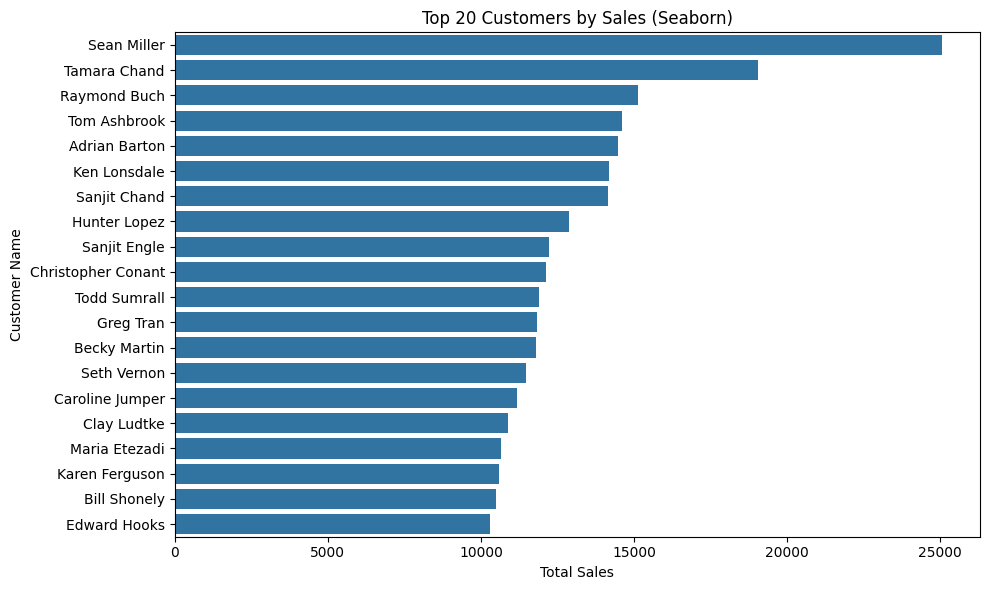

In [41]:
#What are the Top 20 customers by Sales? Using Seaborn

import seaborn as sns
top_20_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(20).reset_index()
top_20_customer_states = pd.merge(top_20_customers, df[['Customer Name', 'State']], on='Customer Name', how='left').drop_duplicates()

fig = px.bar(top_20_customer_states, x='Customer Name', y='State',
             title='Top 20 Customers and Their States',
             labels={'Customer Name': 'Customer', 'State': 'State'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Customer Name', data=top_20_customers)
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.title('Top 20 Customers by Sales (Seaborn)')
plt.tight_layout()
plt.show()

In [33]:
#identifiying the top 20 cities
city_sales_profit = df.groupby('City').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
top_20_cities_sales = city_sales_profit.sort_values('Sales', ascending=False).head(20)
top_20_cities_profit = city_sales_profit.sort_values('Profit', ascending=False).head(20)

fig = px.bar(top_20_cities_sales, x='City', y='Sales',
             title='Sales of Top 20 Cities by Sales',
             labels={'Sales': 'Sales '})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


fig = px.bar(top_20_cities_sales, x='City', y='Profit',
             title='Profit of Top 20 Cities by Sales',
             labels={'Profit': 'Profit '})
fig.update_layout(xaxis_tickangle=-45)
fig.show()



In [ ]:
#Top 20 customers using Plotly
import plotly.express as px

fig = px.bar(top_20_customers, x='Customer Name', y='Sales',
             title='Top 20 Customers by Sales (Plotly)',
             labels={'Customer Name': 'Customer', 'Sales': 'Total Sales'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [40]:
#Calculating the Customer sales by Cumulative Sales by Customer
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).cumsum().reset_index()
total_sales = customer_sales['Sales'].iloc[-1]
print("Total Sales:", total_sales.round(2))

customer_sales['Cumulative Percentage'] = (customer_sales['Sales'] / total_sales) * 100
fig = px.line(customer_sales, x='Customer Name', y='Cumulative Percentage',
              title='Cumulative Sales by Customer',
              labels={'Customer Name': 'Customer', 'Cumulative Percentage': 'Cumulative Sales (%)'})
fig.show()


Total Sales: 2297200.86
